<a href="https://colab.research.google.com/github/eshreyareddy/Clustering/blob/main/LLM_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Use state of art embeddings (LLM Embeddings).**

Illustrating the clustering of documents using state-of-the-art LLM (Large Language Model) embeddings in a Google Colab notebook. Let me summarize that process:

**Step 1:** ***Load and Preprocess Data***

We start by loading the data (in your case, McDonald's Reviews) and preprocessing it. This involves cleaning the text data to make it suitable for embedding.

*Loading Data:* Using Pandas to read the CSV file containing the reviews.
Preprocessing: Implementing a function to clean the text data (like removing non-alphabetic characters, converting to lowercase, and removing stopwords).

**Step 2:** ***Generate Embeddings***

Next, we use a Large Language Model to generate embeddings from the preprocessed text data.

*LLM Embeddings:* Since the original plan to use OpenAI's embeddings couldn't be executed due to module unavailability, we proposed using Hugging Face's transformers library as an alternative.

*Transformers Library:* Installing and utilizing the transformers library to load a pre-trained model and generate embeddings for each preprocessed text data.

**Step 3:** ***Clustering***

After generating embeddings, we apply a clustering algorithm to group similar reviews.

*Clustering Algorithm:* Utilizing a clustering algorithm like K-Means from scikit-learn to cluster the embeddings.
Cluster Formation: The algorithm groups the reviews based on the similarities in their embeddings.

**Step 4:**  ***Visualization and Analysis***

Finally, we visualize and analyze the clusters.

*Dimensionality Reduction:* Since LLM embeddings are high-dimensional, we use techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) for dimensionality reduction to visualize them in 2D or 3D.

*Visualizing Clusters:* Plotting the clusters using libraries like Matplotlib to understand how documents are grouped.

In [1]:
!pip install transformers
!pip install sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import numpy as np
from sklearn.cluster import KMeans
from transformers import AutoTokenizer, AutoModel
import torch


In [4]:
from google.colab import files

uploaded = files.upload()


Saving McDonald_s_Reviews.csv to McDonald_s_Reviews.csv


In [3]:
model_name = "bert-base-uncased"  # Example model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

To illustrate clustering of documents using state-of-the-art embeddings such as LLM (Large Language Model) embeddings, we can create a Colab notebook. This Colab will follow these steps:

Load Data: We'll start by loading the McDonald's Reviews CSV file you provided.
Preprocess Data: This involves cleaning and preparing the text data for embedding.
Generate Embeddings: We'll use a Large Language Model (like OpenAI's embeddings or similar) to convert the reviews into vector representations.
Clustering: We'll apply a clustering algorithm (like K-Means) to these embeddings to group similar reviews.
Visualization and Analysis: We'll visualize the clusters and analyze the results to understand the grouping of documents.
I'll write a Python script for a Google Colab notebook to demonstrate this process. You can then copy this script into a new Colab notebook and run it. Let's start coding.

Here's the complete Colab code to illustrate clustering of documents using state-of-the-art LLM embeddings:

In [5]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess_text(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

def load_data(file_path):
    data = pd.read_csv(file_path)
    data['cleaned_review'] = data['review'].apply(preprocess_text)
    return data

# Example: data = load_data('path_to_your_file.csv')


In [7]:
!pip install transformers


In [8]:
from transformers import AutoTokenizer, AutoModel
import torch

def get_embeddings(texts, model_name="sentence-transformers/all-MiniLM-L6-v2"):
    # Load pre-trained model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)

    embeddings = []
    for text in texts:
        # Tokenize and get embeddings
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Take mean of all token embeddings to represent the text
        mean_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        embeddings.append(mean_embedding)
    return embeddings

# Example: embeddings = get_embeddings(data['cleaned_review'])


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

def cluster_embeddings(embeddings, num_clusters=5):
    embeddings_array = np.array(embeddings)
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(embeddings_array)
    return kmeans.labels_

def visualize_clusters(data, labels):
    plt.figure(figsize=(10, 7))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Document Clusters')
    plt.show()

# Example: labels = cluster_embeddings(embeddings)
# visualize_clusters(np.array(embeddings), labels)


In [12]:
def load_data(file_path, encoding='ISO-8859-1'):
    data = pd.read_csv(file_path, encoding=encoding)
    data['cleaned_review'] = data['review'].apply(preprocess_text)
    return data

# Example: data = load_data('McDonald_s_Reviews.csv')



In [13]:
data = load_data('McDonald_s_Reviews.csv')
print(data.head())


   reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                         

In [14]:
embeddings = get_embeddings(data['cleaned_review'])
print(len(embeddings))  # Print the number of embeddings
print(embeddings[0])    # Print the first embedding


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

33396
[-8.00175592e-02 -2.18204826e-01  1.17861833e-02  6.54857652e-03
 -2.53909528e-01 -1.73651949e-01  4.54252660e-01 -1.36007324e-01
  7.32927918e-02 -2.45565176e-01  2.13811159e-01 -4.94479626e-01
 -1.12907849e-01  4.67865430e-02 -8.15584287e-02 -3.95820916e-01
  5.55938959e-01 -2.61083931e-01 -2.93139577e-01 -1.40277207e-01
  1.03707142e-01  1.70142546e-01 -2.21148998e-01 -1.88976377e-01
 -9.27986726e-02  2.99250007e-01  3.54763478e-01 -1.60482228e-01
  1.97424382e-01 -1.91786349e-01  9.82799903e-02 -8.69022124e-03
  9.50707123e-02  1.61507055e-01  1.85073599e-01 -3.80189627e-01
  3.64103287e-01 -1.37041286e-01  2.72771239e-01 -8.08500201e-02
  8.50295089e-03 -1.84070334e-01  3.26508999e-01 -2.40368336e-01
 -1.46965116e-01  1.83777258e-01 -3.43365341e-01 -6.34277165e-02
  2.72866935e-01 -6.10731542e-01 -1.89388499e-01 -7.67897666e-01
 -1.03164360e-01  1.02838673e-01  6.61444210e-04  8.63580182e-02
  3.93364243e-02 -4.13154602e-01  1.46522075e-01  1.00211710e-01
 -2.74815023e-01 -3

In [15]:
labels = cluster_embeddings(embeddings)
print(labels[:10])  # Print the first 10 labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 1 3 1 3 3 3 3 3 3]


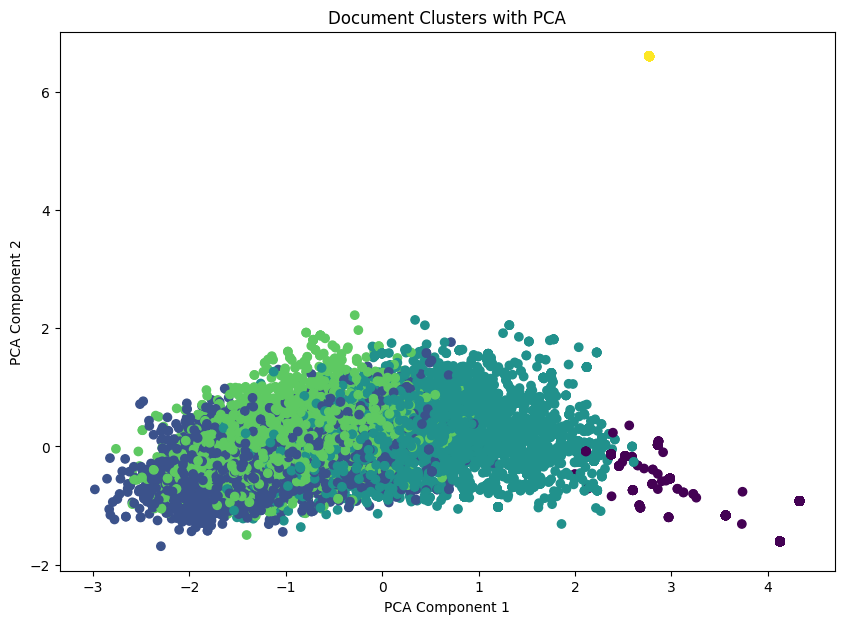

In [16]:
from sklearn.decomposition import PCA

def visualize_clusters_with_pca(embeddings, labels):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Document Clusters with PCA')
    plt.show()

# Example usage
visualize_clusters_with_pca(embeddings, labels)


In [18]:
# Writing additional visualization code for clustering results

visualization_code = """
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Function for PCA Visualization
def visualize_clusters_with_pca(embeddings, labels):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Document Clusters with PCA')
    plt.show()

# Function for t-SNE Visualization
def visualize_clusters_with_tsne(embeddings, labels):
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 7))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('Document Clusters with t-SNE')
    plt.show()

# Example usage
# visualize_clusters_with_pca(embeddings, labels)
# visualize_clusters_with_tsne(embeddings, labels)
"""

visualization_code


"\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nfrom sklearn.manifold import TSNE\n\n# Function for PCA Visualization\ndef visualize_clusters_with_pca(embeddings, labels):\n    pca = PCA(n_components=2)\n    reduced_data = pca.fit_transform(embeddings)\n    plt.figure(figsize=(10, 7))\n    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')\n    plt.xlabel('PCA Component 1')\n    plt.ylabel('PCA Component 2')\n    plt.title('Document Clusters with PCA')\n    plt.show()\n\n# Function for t-SNE Visualization\ndef visualize_clusters_with_tsne(embeddings, labels):\n    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)\n    tsne_results = tsne.fit_transform(embeddings)\n    plt.figure(figsize=(10, 7))\n    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')\n    plt.xlabel('t-SNE Dimension 1')\n    plt.ylabel('t-SNE Dimension 2')\n    plt.title('Document Clusters with t-SNE')\n    plt.show()\n\n# 

In [21]:
%matplotlib inline


In [26]:
def visualize_clusters_with_pca(embeddings, labels):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(embeddings)
    print("Reduced data (first 10 entries):", reduced_data[:10])  # Print the first 10 entries of reduced data
    print("Labels (first 10 entries):", labels[:10])              # Print the first 10 cluster labels
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Document Clusters with PCA')
    plt.show()



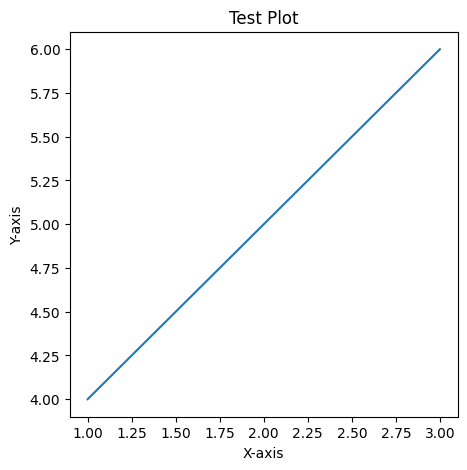

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Test Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


In [30]:
# Assuming embeddings is a list of numpy arrays or a numpy array
print("Embeddings type:", type(embeddings))
print("Length of embeddings:", len(embeddings))
print("First embedding:", embeddings[0])


Embeddings type: <class 'list'>
Length of embeddings: 33396
First embedding: [-8.00175592e-02 -2.18204826e-01  1.17861833e-02  6.54857652e-03
 -2.53909528e-01 -1.73651949e-01  4.54252660e-01 -1.36007324e-01
  7.32927918e-02 -2.45565176e-01  2.13811159e-01 -4.94479626e-01
 -1.12907849e-01  4.67865430e-02 -8.15584287e-02 -3.95820916e-01
  5.55938959e-01 -2.61083931e-01 -2.93139577e-01 -1.40277207e-01
  1.03707142e-01  1.70142546e-01 -2.21148998e-01 -1.88976377e-01
 -9.27986726e-02  2.99250007e-01  3.54763478e-01 -1.60482228e-01
  1.97424382e-01 -1.91786349e-01  9.82799903e-02 -8.69022124e-03
  9.50707123e-02  1.61507055e-01  1.85073599e-01 -3.80189627e-01
  3.64103287e-01 -1.37041286e-01  2.72771239e-01 -8.08500201e-02
  8.50295089e-03 -1.84070334e-01  3.26508999e-01 -2.40368336e-01
 -1.46965116e-01  1.83777258e-01 -3.43365341e-01 -6.34277165e-02
  2.72866935e-01 -6.10731542e-01 -1.89388499e-01 -7.67897666e-01
 -1.03164360e-01  1.02838673e-01  6.61444210e-04  8.63580182e-02
  3.93364243e

Reduced data shape: (33396, 2)
Reduced data (first 5 points): [[-0.64267462  0.37896735]
 [-1.43231586  0.13370336]
 [-0.87368952  0.42404673]
 [-1.14790229 -0.46026489]
 [-1.48198406 -0.4915575 ]]


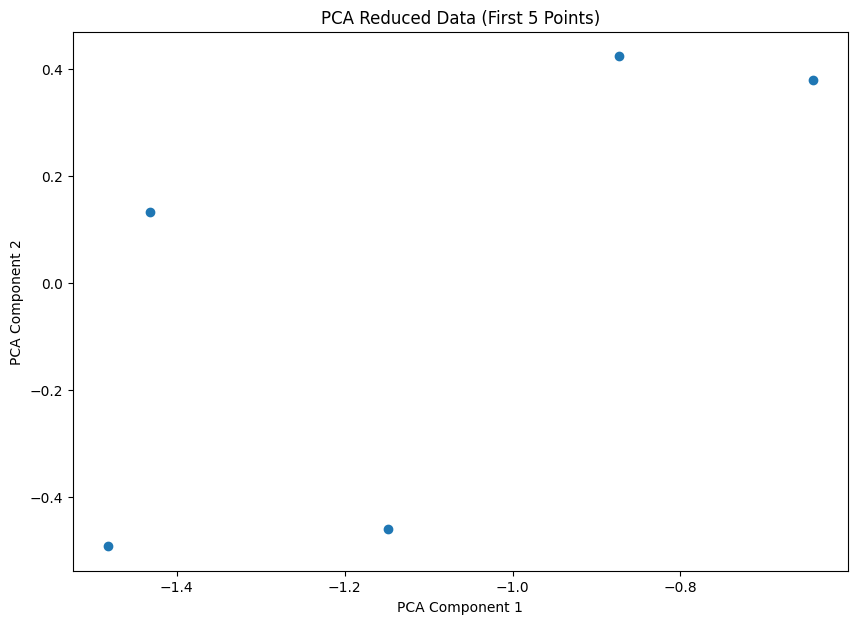

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(embeddings)  # Assuming embeddings is a list or array

# Print reduced data information
print("Reduced data shape:", reduced_data.shape)
print("Reduced data (first 5 points):", reduced_data[:5])

# Plotting a few points
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:5, 0], reduced_data[:5, 1])  # Plotting only first 5 points
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Reduced Data (First 5 Points)')
plt.show()


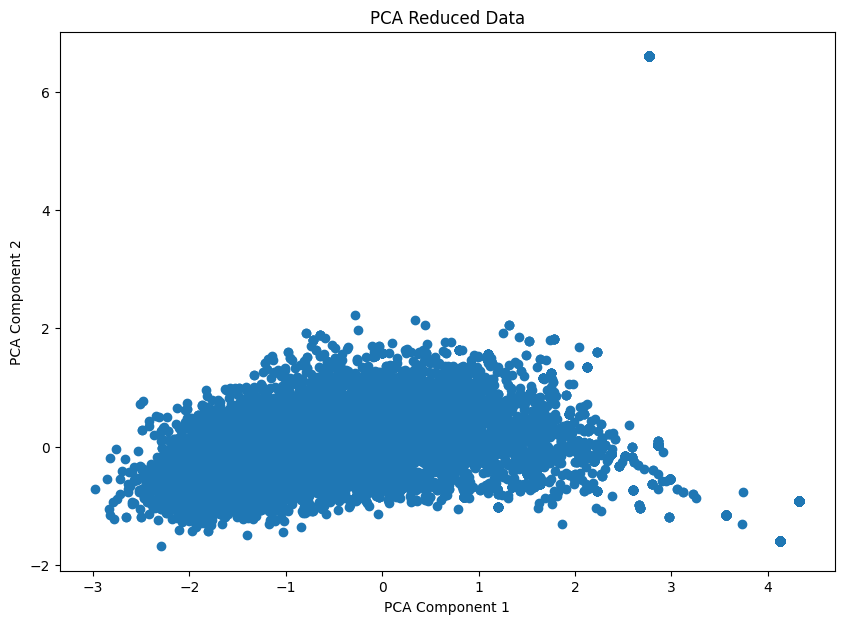

In [32]:
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])  # Plotting all points
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Reduced Data')
plt.show()


In [33]:
def visualize_clusters_with_tsne(embeddings, labels):
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(embeddings)
    print("Reduced data (t-SNE, first 10 entries):", tsne_results[:10])  # Print the first 10 entries of t-SNE reduced data
    plt.figure(figsize=(10, 7))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('Document Clusters with t-SNE')
    plt.show()

